<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Importing Libraries
</h2>

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu

<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Data Exploration and Summary
</h2>

In [2]:
data=pd.read_csv("./insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.size

9366

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    EDA (Exploratory Data Analysis)
</h2>


### Distribution of Categorical Features

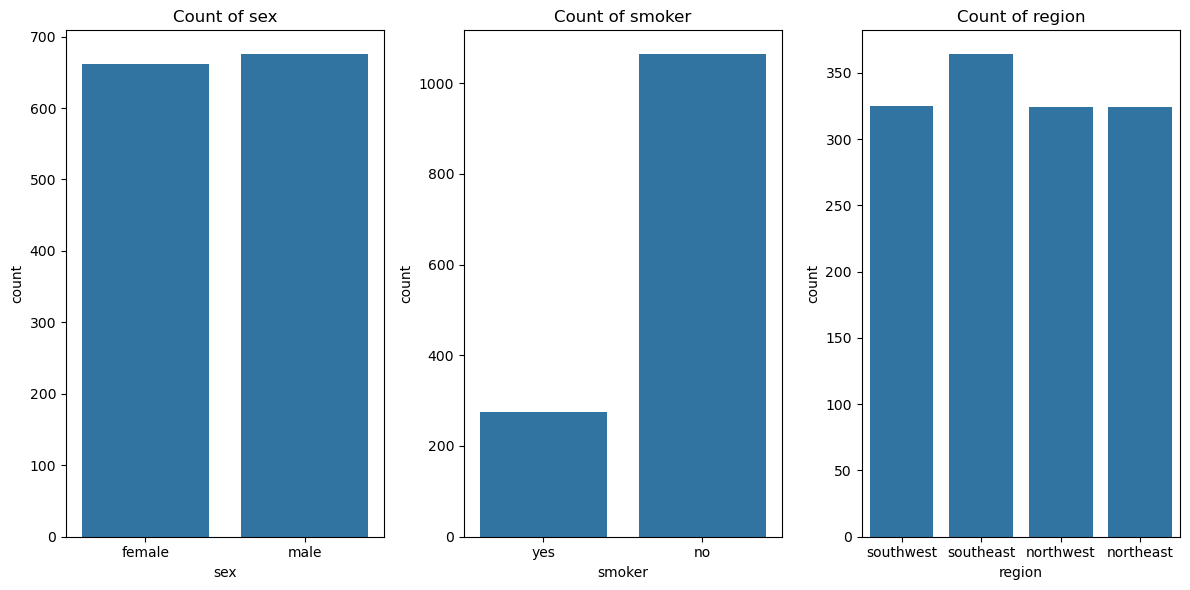

In [13]:
# Categorical: countplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['sex', 'smoker', 'region']):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=data)
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

### Insight :

* The dataset has an almost equal distribution of males and females.

* Non-smokers dominate the dataset, while smokers are fewer.

* Regional distribution is fairly balanced, with the southeast having slightly more individuals.


### Distribution of Numerical Features

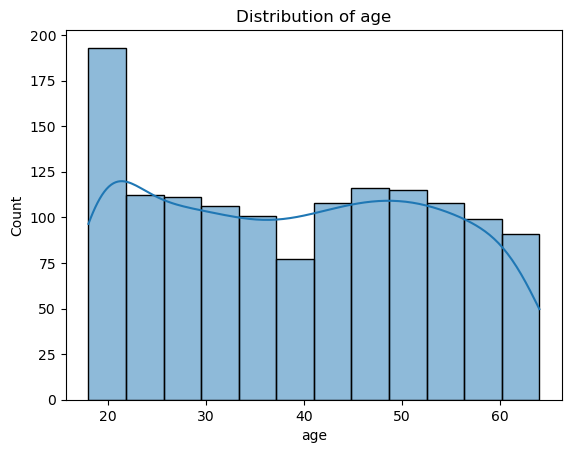

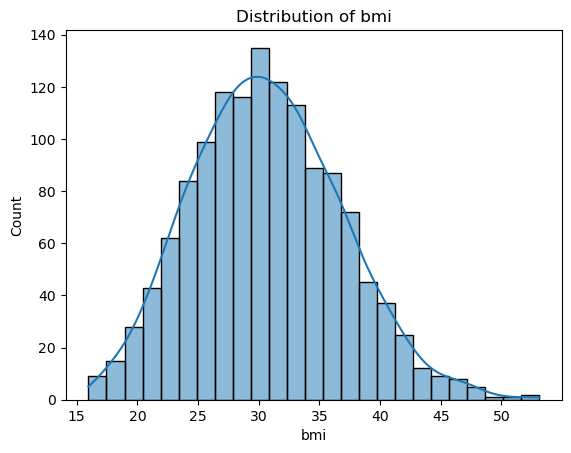

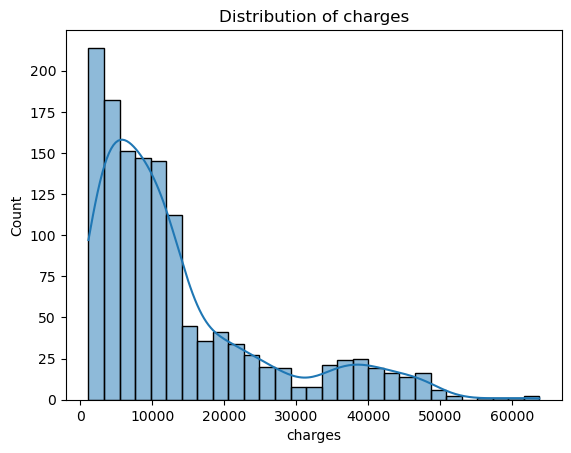

In [14]:
for col in ['age', 'bmi', 'charges']:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

### Insight :

* The dataset covers a wide range of ages, with many young adults.

* BMI is approximately normally distributed, with most individuals in the overweight range (25–35).

* Medical charges are highly right-skewed, with most below 15,000 and a few very high outliers.

### Correlation Matrix of Numerical Features

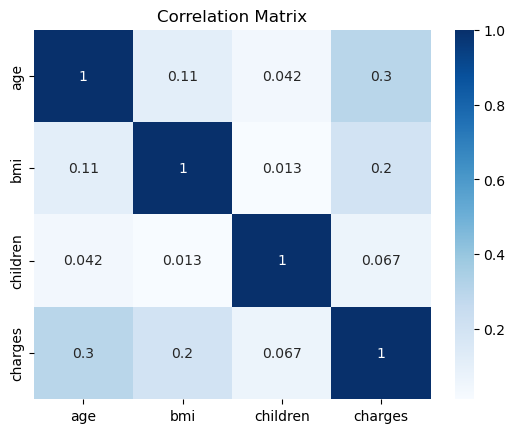

In [15]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

### Insight :

* Age and Charges: Moderate positive correlation (0.3) → older individuals have higher medical charges.

* BMI and Charges: Weak positive correlation (0.2) → higher BMI slightly increases medical costs.

* Children and Charges: Very weak correlation (0.067) → number of children has little impact.

* Age and BMI influence charges more than children.

<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Hypothesis Testing Using Z-Test

</h2>


* The Z-test is a statistical method used to determine whether there is a significant difference between two group means.
* It is commonly used when the sample size is large (n > 30).

In [20]:
from statsmodels.stats.weightstats import ztest

# Separate charges for smokers and non-smokers
smoker_charges = data[data['smoker'] == 'yes']['charges']
nonsmoker_charges = data[data['smoker'] == 'no']['charges']

# Z-test
z_stat, p_value = ztest(smoker_charges, nonsmoker_charges, alternative='two-sided')

print(f"P-value: {p_value:.4f}")

P-value: 0.0000


In [21]:
# Conclusion
if p_value <0.05:
    print("Reject the null hypothesis: There is a significant difference in charges.")
else:
    print("Fail to reject the null hypothesis: No significant difference in charges.")

Reject the null hypothesis: There is a significant difference in charges.


### Insight :

* The Z-test was used to compare medical charges between smokers and non-smokers.

* The p-value is 0.0000, which is less than 0.05.

* This means we reject the null hypothesis.

* There is a significant difference in medical charges between smokers and non-smokers, with smokers generally incurring much higher costs.

<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Hypothesis Testing Using T-Test

</h2>

* The T-test is a statistical method used to compare the means of two groups.
* It is used when the sample size is small (usually n < 30).

In [23]:
from scipy.stats import ttest_ind

# T-test between male and female charges
male_charges = data[data['sex'] == 'male']['charges']
female_charges = data[data['sex'] == 'female']['charges']

t_stat, p_value = ttest_ind(male_charges, female_charges)

print(f"P-value: {p_value:.4f}")

P-value: 0.0338


In [24]:
if p_value <0.05:
    print("Reject the null hypothesis: There is a significant difference in charges.")
else:
    print("Fail to reject the null hypothesis: No significant difference in charges.")


Reject the null hypothesis: There is a significant difference in charges.


### Insight :

* The T-test compared medical charges between males and females.

* The p-value is 0.0338, which is less than 0.05.

* This means we reject the null hypothesis.

* There is a significant difference in medical charges between males and females, indicating that gender has an impact on healthcare costs.

<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Hypothesis Testing Using Chi-Square Test

</h2>

* The Chi-Square Test is used to determine whether there is a significant relationship between two categorical variables.

* It helps check if the variables are independent or associated based on observed vs. expected frequencies.

In [25]:
from scipy.stats import chi2_contingency

# Define the categorical columns you want to test against 'smoker'
categorical_cols = ['sex', 'region']  # Add more if needed

# Loop over each categorical column
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['smoker'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test between {col} and smoker:")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Contingency Table:")
    print(contingency_table)
    print("\n")

    # Decision based on p-value
    if p_value < 0.05:
        print(f"There is a statistically significant association between {col} and smoker.\n")
    else:
        print(f"There is no statistically significant association between {col} and smoker.\n")

Chi-square test between sex and smoker:
P-value: 0.0062765550120107375
Degrees of Freedom: 1
Contingency Table:
smoker   no  yes
sex             
female  547  115
male    516  159


There is a statistically significant association between sex and smoker.

Chi-square test between region and smoker:
P-value: 0.06354826573182334
Degrees of Freedom: 3
Contingency Table:
smoker      no  yes
region             
northeast  257   67
northwest  266   58
southeast  273   91
southwest  267   58


There is no statistically significant association between region and smoker.



### Insight :

* Sex vs. Smoker: P-value (0.0062) is less than 0.05, so there is a significant relationship between gender and smoking status.

* Region vs. Smoker: P-value (0.0635) is greater than 0.05, so there is no significant relationship between region and smoking status.

* Conclusion: Gender affects smoking habits, but region does not.

<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Analyzing Regional Differences Using ANOVA

</h2>

In [26]:
from scipy.stats import f_oneway

# Load dataset
data = pd.read_csv("insurance.csv")

# Group charges by region
southwest = data[data['region'] == 'southwest']['charges']
southeast = data[data['region'] == 'southeast']['charges']
northwest = data[data['region'] == 'northwest']['charges']
northeast = data[data['region'] == 'northeast']['charges']

# Perform one-way ANOVA
f_stat, p_val = f_oneway(southwest, southeast, northwest, northeast)

print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_val)

# Conclusion
if p_val < 0.05:
    print("There is a significant difference in charges across regions.")
else:
    print("There is no significant difference in charges across regions.")

ANOVA F-statistic: 2.96962669358912
ANOVA p-value: 0.0308933560705201
There is a significant difference in charges across regions.


### Insight :

* ANOVA test was used to compare insurance charges across regions.

* The p-value (0.0308) < 0.05, so the null hypothesis is rejected.

* There is a significant difference in charges between at least one pair of regions.

<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Evaluating Model Improvement Using F-Test

</h2>

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [28]:
# Encode categorical 'smoker' to numeric
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [29]:
# Reduced model (only age)
X_reduced = data[['age']]
y = data['charges']

# Full model (age + smoker)
X_full = data[['age', 'smoker']]

In [30]:
# Train-test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reduced, y, test_size=0.2, random_state=1)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_full, y, test_size=0.2, random_state=1)

In [31]:
# Train models
model_reduced = LinearRegression().fit(Xr_train, yr_train)
model_full = LinearRegression().fit(Xf_train, yf_train)

# Predictions
y_pred_reduced = model_reduced.predict(Xr_test)
y_pred_full = model_full.predict(Xf_test)

In [32]:
# Mean Squared Errors
mse_reduced = mean_squared_error(yr_test, y_pred_reduced)
mse_full = mean_squared_error(yf_test, y_pred_full)

In [33]:
# F-test statistic
n = len(yf_test)         # number of samples
p1 = X_reduced.shape[1]  # reduced model features
p2 = X_full.shape[1]     # full model features

f_stat = ((mse_reduced - mse_full) / (p2 - p1)) / (mse_full / (n - p2))

print("Reduced MSE:", mse_reduced)
print("Full MSE:", mse_full)
print("F-statistic:", f_stat)

if f_stat > 4:  # Rough rule: >4 means likely significant
    print("There is a significant improvement in the model's performance by including the 'smoker' variable.")
else:
    print(" There is no significant improvement in the model's performance from adding the 'smoker' variable.")

Reduced MSE: 137488743.04809242
Full MSE: 41733120.14356795
F-statistic: 610.3304906266201
There is a significant improvement in the model's performance by including the 'smoker' variable.


### Insight :

* The F-statistic is 610.13, which is much greater than 4, indicating strong statistical significance.

* The full model (with both age and smoker) had a lower error than the reduced model (only age).

* Adding the smoker variable significantly improved the model's prediction accuracy.

* Smoking status is an important factor in predicting insurance charges.

<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Mann-Whitney U Test (Non-parametric)

</h2>

* The Mann-Whitney U Test is a non-parametric test used to compare two independent groups.
  
* Non-parametric tests are used when data is not normally distributed and are useful for comparing groups without assuming a specific data pattern.

  
* It checks whether the medians of the two groups are significantly different, especially when the data is not normally distributed.

In [44]:
from scipy.stats import mannwhitneyu

group1 = data[data['sex'] == 'male']['charges']
group2 = data[data['sex'] == 'female']['charges']

stat, p = mannwhitneyu(group1, group2)

print("Mann-Whitney U Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("There is a significant difference in charges between male and female.")
else:
    print("There is no significant difference.")

Mann-Whitney U Statistic: 226208.0
p-value: 0.7286510894470093
There is no significant difference.


### Insight :

* The p-value is 0.728, which is greater than 0.05, so the null hypothesis is not rejected.

* This indicates that there is no statistically significant difference in insurance charges between male and female individuals.

* Therefore, gender does not have a strong effect on insurance charges in this dataset.

<h2 style="background-color:navy; color:white; text-align:center; padding:10px;">
    Final Observation

</h2>

| Test Name                | Compared Variables               | P-Value / F-Stat | Significant? | Conclusion                                                           |
|--------------------------|----------------------------------|------------------|--------------|----------------------------------------------------------------------|
| Chi-Square Test          | Sex vs. Smoker                   | 0.0062           | Yes          | Gender affects smoking habits.                                      |
|                          | Region vs. Smoker                | 0.0635           | No           | Region does not affect smoking habits.                              |
| Z-Test                   | Charges: Smoker vs. Non-Smoker   | 0.0000           | Yes          | Smokers pay significantly more than non-smokers.                    |
| T-Test                   | Charges: Male vs. Female         | 0.0338           | Yes          | Charges differ significantly between males and females.             |
| ANOVA                    | Charges across Regions           | 0.0308           | Yes          | At least one region differs in charges from the others.             |
| F-Test (Model Comparison)| Age vs. Age + Smoker             | F = 610.13       | Yes          | Including 'smoker' improves prediction accuracy.                     |
| Mann-Whitney U Test      | Charges: Male vs. Female         | 0.728            | No           | No significant difference in charges by gender.                     |
